In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,GridSearchCV

In [3]:
df=pd.read_csv('application.csv')

In [4]:
df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_WALLSMATERIAL_missing,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,1,0,0,0
3,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
x=df.drop('TARGET',axis=1).values
y=df['TARGET'].values

In [6]:
stf=StratifiedKFold(n_splits=10)

In [7]:
for train,test in stf.split(x,y):
    x_train,x_test,y_train,y_test=x[train],x[test],y[train],y[test]

In [8]:
from imblearn.over_sampling import SMOTE

C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\beast brothers\anaconda3\lib\site-packages\tensorflow\python\framework

In [9]:
smote=SMOTE(sampling_strategy='minority')

In [10]:
scaler=StandardScaler()

In [11]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [12]:
import seaborn as sn

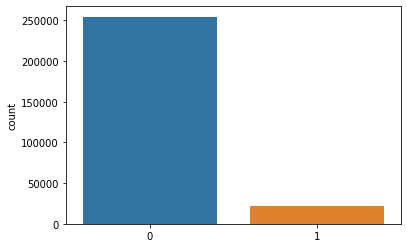

In [13]:
sn.countplot(y_train)

In [14]:
x_train,y_train=smote.fit_sample(x_train,y_train)

In [15]:
np.sum(y_train),np.sum(1-y_train)

(254417, 254417)

In [16]:
import xgboost

In [17]:
xgb=xgboost.XGBClassifier(n_estimators=100)

In [18]:
params={
        'max_depth':[4,6,8,10,12,14],'subsample':[0.5,0.7,0.8,0.9],
        'colsample_bytree':[0.6,0.8,0.9],'gamma':[1,3,5],'reg_lambda':[1,5,10]
            }

In [19]:
random=RandomizedSearchCV(xgb,param_distributions=params,cv=StratifiedKFold(n_splits=5),n_iter=90,scoring='f1',verbose=5)

In [23]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9, score=0.773, total= 2.3min
[CV] subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9, score=0.995, total= 2.3min
[CV] subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9, score=0.996, total= 2.2min
[CV] subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.9min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9, score=0.996, total= 2.2min
[CV] subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  9.0min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=10, max_depth=4, gamma=1, colsample_bytree=0.9, score=0.996, total= 2.2min
[CV] subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6, score=0.777, total= 3.8min
[CV] subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6, score=0.998, total= 3.8min
[CV] subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6, score=0.998, total= 3.8min
[CV] subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6, score=0.998, total= 4.5min
[CV] subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_lambda=10, max_depth=10, gamma=5, co

[CV]  subsample=0.5, reg_lambda=1, max_depth=10, gamma=1, colsample_bytree=0.8, score=0.998, total= 5.3min
[CV] subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8 
[CV]  subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8, score=0.773, total= 1.9min
[CV] subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8 
[CV]  subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8, score=0.996, total= 1.9min
[CV] subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8 
[CV]  subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8, score=0.996, total= 1.9min
[CV] subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8 
[CV]  subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8, score=0.995, total= 1.9min
[CV] subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8 
[CV]  subsample=0.9, reg_lambda=5, max_depth=4, gamma=3, colsample_bytree=0.8, 

[CV]  subsample=0.7, reg_lambda=5, max_depth=12, gamma=3, colsample_bytree=0.8, score=0.998, total= 7.1min
[CV] subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8, score=0.776, total= 3.1min
[CV] subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8, score=0.997, total= 3.1min
[CV] subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8, score=0.998, total= 3.1min
[CV] subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8, score=0.997, total= 3.1min
[CV] subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.7, reg_lambda=10, max_depth=6, gamma=5, colsample_by

[CV]  subsample=0.5, reg_lambda=1, max_depth=14, gamma=5, colsample_bytree=0.6, score=0.998, total= 5.8min
[CV] subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9 
[CV]  subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9, score=0.773, total= 2.5min
[CV] subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9 
[CV]  subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9, score=0.995, total= 2.4min
[CV] subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9 
[CV]  subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9, score=0.996, total= 2.5min
[CV] subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9 
[CV]  subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9, score=0.995, total= 2.5min
[CV] subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_bytree=0.9 
[CV]  subsample=0.5, reg_lambda=10, max_depth=4, gamma=5, colsample_by

KeyboardInterrupt: 

the above search run for 1 day. From the results I took the best list of params and tried

In [20]:
best_xgb=xgboost.XGBClassifier(n_estimators=150,subsample=0.9, reg_lambda=5, max_depth=14, gamma=3, colsample_bytree=0.9,n_jobs=-1)

In [26]:
best_xgb.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric=['aucpr','auc'],
        verbose=True)
#evals_result = clf.evals_result()

[0]	validation_0-aucpr:0.967098	validation_0-auc:0.957167	validation_1-aucpr:0.372084	validation_1-auc:0.773632
[1]	validation_0-aucpr:0.981782	validation_0-auc:0.976199	validation_1-aucpr:0.392566	validation_1-auc:0.797795
[2]	validation_0-aucpr:0.983718	validation_0-auc:0.978937	validation_1-aucpr:0.395325	validation_1-auc:0.800809
[3]	validation_0-aucpr:0.986503	validation_0-auc:0.982367	validation_1-aucpr:0.40825	validation_1-auc:0.806127
[4]	validation_0-aucpr:0.987772	validation_0-auc:0.983884	validation_1-aucpr:0.415225	validation_1-auc:0.809618
[5]	validation_0-aucpr:0.988335	validation_0-auc:0.984691	validation_1-aucpr:0.418462	validation_1-auc:0.811686
[6]	validation_0-aucpr:0.988834	validation_0-auc:0.985373	validation_1-aucpr:0.42368	validation_1-auc:0.814581
[7]	validation_0-aucpr:0.989236	validation_0-auc:0.985894	validation_1-aucpr:0.426577	validation_1-auc:0.815868
[8]	validation_0-aucpr:0.989573	validation_0-auc:0.98641	validation_1-aucpr:0.429715	validation_1-auc:0.81

[73]	validation_0-aucpr:0.996068	validation_0-auc:0.995324	validation_1-aucpr:0.499343	validation_1-auc:0.840041
[74]	validation_0-aucpr:0.996117	validation_0-auc:0.995386	validation_1-aucpr:0.499383	validation_1-auc:0.840143
[75]	validation_0-aucpr:0.996156	validation_0-auc:0.995437	validation_1-aucpr:0.499508	validation_1-auc:0.840278
[76]	validation_0-aucpr:0.996193	validation_0-auc:0.995485	validation_1-aucpr:0.49947	validation_1-auc:0.840361
[77]	validation_0-aucpr:0.99623	validation_0-auc:0.995532	validation_1-aucpr:0.499287	validation_1-auc:0.840241
[78]	validation_0-aucpr:0.9963	validation_0-auc:0.995623	validation_1-aucpr:0.499434	validation_1-auc:0.840283
[79]	validation_0-aucpr:0.996315	validation_0-auc:0.995642	validation_1-aucpr:0.499516	validation_1-auc:0.840291
[80]	validation_0-aucpr:0.996346	validation_0-auc:0.995682	validation_1-aucpr:0.499433	validation_1-auc:0.84019
[81]	validation_0-aucpr:0.996389	validation_0-auc:0.995737	validation_1-aucpr:0.499395	validation_1-a

[146]	validation_0-aucpr:0.998267	validation_0-auc:0.998055	validation_1-aucpr:0.4995	validation_1-auc:0.840981
[147]	validation_0-aucpr:0.998305	validation_0-auc:0.998101	validation_1-aucpr:0.499588	validation_1-auc:0.840857
[148]	validation_0-aucpr:0.998322	validation_0-auc:0.998121	validation_1-aucpr:0.49954	validation_1-auc:0.840819
[149]	validation_0-aucpr:0.99835	validation_0-auc:0.998154	validation_1-aucpr:0.499436	validation_1-auc:0.84078


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [28]:
pred=best_xgb.predict(x_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28269
           1       0.92      0.26      0.40      2482

    accuracy                           0.94     30751
   macro avg       0.93      0.63      0.68     30751
weighted avg       0.94      0.94      0.92     30751



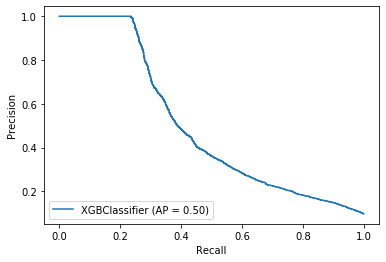

In [31]:
plot_precision_recall_curve(best_xgb,x_test,y_test)

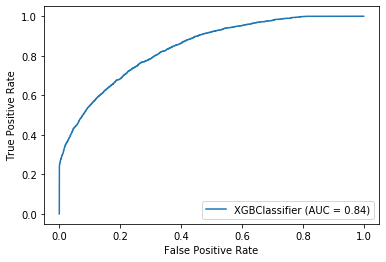

In [34]:
plot_roc_curve(best_xgb,x_test,y_test)

In [22]:
params={'min_child_weight':[10,20,30,40,50,100]}

In [23]:
xgb2=xgboost.XGBClassifier(n_estimators=100,subsample=0.7, reg_lambda=5, max_depth=12, gamma=3, colsample_bytree=0.8,n_jobs=-1)

In [24]:
best_xgb2=GridSearchCV(xgb2,params,cv=StratifiedKFold(n_splits=5),scoring='f1',n_jobs=-1,verbose=30)

In [25]:
best_xgb2.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=12, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=5,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.7, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [10, 20, 30, 40, 50, 100]},
             pre_dispatch='

In [26]:
best_xgb2.best_params_

{'min_child_weight': 10}

In [27]:
xgb2=best_xgb2.best_estimator_
xgb2.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric=['aucpr','auc'],
        verbose=True)

[0]	validation_0-aucpr:0.962367	validation_0-auc:0.951865	validation_1-aucpr:0.373599	validation_1-auc:0.774391
[1]	validation_0-aucpr:0.977331	validation_0-auc:0.970693	validation_1-aucpr:0.390563	validation_1-auc:0.794761
[2]	validation_0-aucpr:0.981234	validation_0-auc:0.975465	validation_1-aucpr:0.400557	validation_1-auc:0.801699
[3]	validation_0-aucpr:0.983682	validation_0-auc:0.978709	validation_1-aucpr:0.407904	validation_1-auc:0.80608
[4]	validation_0-aucpr:0.985129	validation_0-auc:0.980635	validation_1-aucpr:0.406406	validation_1-auc:0.806772
[5]	validation_0-aucpr:0.985748	validation_0-auc:0.981495	validation_1-aucpr:0.409174	validation_1-auc:0.810477
[6]	validation_0-aucpr:0.986083	validation_0-auc:0.981941	validation_1-aucpr:0.410012	validation_1-auc:0.81159
[7]	validation_0-aucpr:0.98679	validation_0-auc:0.982816	validation_1-aucpr:0.414177	validation_1-auc:0.814108
[8]	validation_0-aucpr:0.987349	validation_0-auc:0.983529	validation_1-aucpr:0.41848	validation_1-auc:0.816

[73]	validation_0-aucpr:0.993006	validation_0-auc:0.991145	validation_1-aucpr:0.498878	validation_1-auc:0.839543
[74]	validation_0-aucpr:0.993038	validation_0-auc:0.991192	validation_1-aucpr:0.498957	validation_1-auc:0.839618
[75]	validation_0-aucpr:0.99308	validation_0-auc:0.991253	validation_1-aucpr:0.49907	validation_1-auc:0.839851
[76]	validation_0-aucpr:0.993101	validation_0-auc:0.991283	validation_1-aucpr:0.499243	validation_1-auc:0.839813
[77]	validation_0-aucpr:0.993112	validation_0-auc:0.991297	validation_1-aucpr:0.499487	validation_1-auc:0.839886
[78]	validation_0-aucpr:0.993142	validation_0-auc:0.991339	validation_1-aucpr:0.499862	validation_1-auc:0.839845
[79]	validation_0-aucpr:0.993196	validation_0-auc:0.991414	validation_1-aucpr:0.499864	validation_1-auc:0.839802
[80]	validation_0-aucpr:0.993239	validation_0-auc:0.991475	validation_1-aucpr:0.499976	validation_1-auc:0.839797
[81]	validation_0-aucpr:0.993275	validation_0-auc:0.991526	validation_1-aucpr:0.500126	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [37]:
params={'learning_rate':[0.1,0.05,0.03,0.01,0.005],'reg_lambda':[15,20,30,50,60]}

In [41]:
xgb3=xgboost.XGBClassifier(n_estimators=200,subsample=0.8, max_depth=10, gamma=3, colsample_bytree=0.8,n_jobs=-1,min_child_weight=10)

In [39]:
random_xgb3=GridSearchCV(xgb3,params,cv=StratifiedKFold(n_splits=3),n_jobs=-1,verbose=5,scoring='f1')
random_xgb3.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 27.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=10, min_child_weight=10,
                                     missing=None, n_estimators=200, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.03, 0.01, 0.005],
                         

In [40]:
random_xgb3.best_params_

{'learning_rate': 0.1, 'reg_lambda': 15}

In [18]:
xgb3=xgboost.XGBClassifier(n_estimators=500,subsample=0.9, max_depth=10, gamma=3, colsample_bytree=0.8,n_jobs=-1,min_child_weight=20,reg_lambda=15)

In [48]:

xgb3.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric=['aucpr','auc'],
        verbose=True)

[0]	validation_0-aucpr:0.951236	validation_0-auc:0.938924	validation_1-aucpr:0.373994	validation_1-auc:0.773942
[1]	validation_0-aucpr:0.970099	validation_0-auc:0.961733	validation_1-aucpr:0.382933	validation_1-auc:0.793908
[2]	validation_0-aucpr:0.97442	validation_0-auc:0.966797	validation_1-aucpr:0.393047	validation_1-auc:0.800828
[3]	validation_0-aucpr:0.978119	validation_0-auc:0.971638	validation_1-aucpr:0.403835	validation_1-auc:0.805061
[4]	validation_0-aucpr:0.979687	validation_0-auc:0.974034	validation_1-aucpr:0.399816	validation_1-auc:0.805784
[5]	validation_0-aucpr:0.980828	validation_0-auc:0.975562	validation_1-aucpr:0.401047	validation_1-auc:0.806802
[6]	validation_0-aucpr:0.981968	validation_0-auc:0.977079	validation_1-aucpr:0.402991	validation_1-auc:0.808561
[7]	validation_0-aucpr:0.983323	validation_0-auc:0.978652	validation_1-aucpr:0.404866	validation_1-auc:0.80995
[8]	validation_0-aucpr:0.983923	validation_0-auc:0.97931	validation_1-aucpr:0.406415	validation_1-auc:0.81

[73]	validation_0-aucpr:0.991172	validation_0-auc:0.988439	validation_1-aucpr:0.491669	validation_1-auc:0.838136
[74]	validation_0-aucpr:0.991188	validation_0-auc:0.988464	validation_1-aucpr:0.491388	validation_1-auc:0.838097
[75]	validation_0-aucpr:0.99123	validation_0-auc:0.988525	validation_1-aucpr:0.492961	validation_1-auc:0.838344
[76]	validation_0-aucpr:0.991249	validation_0-auc:0.988554	validation_1-aucpr:0.493095	validation_1-auc:0.838394
[77]	validation_0-aucpr:0.991272	validation_0-auc:0.988588	validation_1-aucpr:0.493351	validation_1-auc:0.838409
[78]	validation_0-aucpr:0.991286	validation_0-auc:0.988609	validation_1-aucpr:0.493286	validation_1-auc:0.838473
[79]	validation_0-aucpr:0.991297	validation_0-auc:0.988626	validation_1-aucpr:0.493204	validation_1-auc:0.838403
[80]	validation_0-aucpr:0.99132	validation_0-auc:0.988661	validation_1-aucpr:0.493398	validation_1-auc:0.838344
[81]	validation_0-aucpr:0.991342	validation_0-auc:0.988693	validation_1-aucpr:0.493347	validation_

[146]	validation_0-aucpr:0.992674	validation_0-auc:0.990655	validation_1-aucpr:0.502926	validation_1-auc:0.841465
[147]	validation_0-aucpr:0.992694	validation_0-auc:0.990684	validation_1-aucpr:0.502912	validation_1-auc:0.841525
[148]	validation_0-aucpr:0.992723	validation_0-auc:0.990726	validation_1-aucpr:0.503066	validation_1-auc:0.841474
[149]	validation_0-aucpr:0.992733	validation_0-auc:0.990741	validation_1-aucpr:0.503352	validation_1-auc:0.841576
[150]	validation_0-aucpr:0.992757	validation_0-auc:0.990775	validation_1-aucpr:0.50332	validation_1-auc:0.841556
[151]	validation_0-aucpr:0.992782	validation_0-auc:0.990811	validation_1-aucpr:0.503285	validation_1-auc:0.841494
[152]	validation_0-aucpr:0.99279	validation_0-auc:0.990822	validation_1-aucpr:0.503326	validation_1-auc:0.841505
[153]	validation_0-aucpr:0.992801	validation_0-auc:0.990837	validation_1-aucpr:0.503461	validation_1-auc:0.841417
[154]	validation_0-aucpr:0.992818	validation_0-auc:0.990861	validation_1-aucpr:0.503512	va

[219]	validation_0-aucpr:0.993839	validation_0-auc:0.992315	validation_1-aucpr:0.504136	validation_1-auc:0.841589
[220]	validation_0-aucpr:0.993853	validation_0-auc:0.992335	validation_1-aucpr:0.504064	validation_1-auc:0.841557
[221]	validation_0-aucpr:0.993858	validation_0-auc:0.992342	validation_1-aucpr:0.504141	validation_1-auc:0.841618
[222]	validation_0-aucpr:0.993864	validation_0-auc:0.99235	validation_1-aucpr:0.504143	validation_1-auc:0.841681
[223]	validation_0-aucpr:0.993885	validation_0-auc:0.992381	validation_1-aucpr:0.504358	validation_1-auc:0.841805
[224]	validation_0-aucpr:0.993898	validation_0-auc:0.992399	validation_1-aucpr:0.504334	validation_1-auc:0.841805
[225]	validation_0-aucpr:0.993911	validation_0-auc:0.992417	validation_1-aucpr:0.504439	validation_1-auc:0.841916
[226]	validation_0-aucpr:0.993935	validation_0-auc:0.992452	validation_1-aucpr:0.504381	validation_1-auc:0.841948
[227]	validation_0-aucpr:0.993946	validation_0-auc:0.992467	validation_1-aucpr:0.504407	v

[292]	validation_0-aucpr:0.994787	validation_0-auc:0.993622	validation_1-aucpr:0.503576	validation_1-auc:0.8418
[293]	validation_0-aucpr:0.994799	validation_0-auc:0.993638	validation_1-aucpr:0.503616	validation_1-auc:0.841885
[294]	validation_0-aucpr:0.994815	validation_0-auc:0.993658	validation_1-aucpr:0.503541	validation_1-auc:0.841974
[295]	validation_0-aucpr:0.994824	validation_0-auc:0.993672	validation_1-aucpr:0.503532	validation_1-auc:0.84192
[296]	validation_0-aucpr:0.994833	validation_0-auc:0.993685	validation_1-aucpr:0.503639	validation_1-auc:0.841994
[297]	validation_0-aucpr:0.994853	validation_0-auc:0.993712	validation_1-aucpr:0.503781	validation_1-auc:0.842144
[298]	validation_0-aucpr:0.994861	validation_0-auc:0.993723	validation_1-aucpr:0.503803	validation_1-auc:0.842102
[299]	validation_0-aucpr:0.994869	validation_0-auc:0.993734	validation_1-aucpr:0.503738	validation_1-auc:0.842148
[300]	validation_0-aucpr:0.994871	validation_0-auc:0.993736	validation_1-aucpr:0.503672	val

[365]	validation_0-aucpr:0.995572	validation_0-auc:0.994665	validation_1-aucpr:0.503794	validation_1-auc:0.841784
[366]	validation_0-aucpr:0.995582	validation_0-auc:0.994679	validation_1-aucpr:0.503879	validation_1-auc:0.841854
[367]	validation_0-aucpr:0.995594	validation_0-auc:0.994693	validation_1-aucpr:0.503787	validation_1-auc:0.841851
[368]	validation_0-aucpr:0.995611	validation_0-auc:0.994717	validation_1-aucpr:0.503751	validation_1-auc:0.841825
[369]	validation_0-aucpr:0.995618	validation_0-auc:0.994725	validation_1-aucpr:0.503739	validation_1-auc:0.841802
[370]	validation_0-aucpr:0.995626	validation_0-auc:0.994736	validation_1-aucpr:0.50369	validation_1-auc:0.841818
[371]	validation_0-aucpr:0.995634	validation_0-auc:0.994746	validation_1-aucpr:0.503704	validation_1-auc:0.841833
[372]	validation_0-aucpr:0.995643	validation_0-auc:0.994758	validation_1-aucpr:0.503829	validation_1-auc:0.841903
[373]	validation_0-aucpr:0.995651	validation_0-auc:0.994769	validation_1-aucpr:0.503878	v

[438]	validation_0-aucpr:0.996203	validation_0-auc:0.995487	validation_1-aucpr:0.503093	validation_1-auc:0.841862
[439]	validation_0-aucpr:0.99621	validation_0-auc:0.995496	validation_1-aucpr:0.503125	validation_1-auc:0.841869
[440]	validation_0-aucpr:0.996217	validation_0-auc:0.995505	validation_1-aucpr:0.503151	validation_1-auc:0.841919
[441]	validation_0-aucpr:0.996225	validation_0-auc:0.995515	validation_1-aucpr:0.503189	validation_1-auc:0.841955
[442]	validation_0-aucpr:0.996237	validation_0-auc:0.995529	validation_1-aucpr:0.503263	validation_1-auc:0.841942
[443]	validation_0-aucpr:0.996243	validation_0-auc:0.995536	validation_1-aucpr:0.503259	validation_1-auc:0.841976
[444]	validation_0-aucpr:0.996247	validation_0-auc:0.995541	validation_1-aucpr:0.503216	validation_1-auc:0.841971
[445]	validation_0-aucpr:0.996257	validation_0-auc:0.995554	validation_1-aucpr:0.503263	validation_1-auc:0.842075
[446]	validation_0-aucpr:0.99626	validation_0-auc:0.995557	validation_1-aucpr:0.503345	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=20, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=15, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)